<a href="https://colab.research.google.com/github/saifMokarrom/Weather-Predictor-Android-App/blob/master/Weather_Classification_TensorFlow_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SAIF** MOKARROM


Access the dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

import train(0.7), validation(.1), test(.2)

Set Image height and width to 64x64 unit

In [3]:
img_height, img_width = 64, 64 
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 849 files belonging to 4 classes.
Found 111 files belonging to 4 classes.
Found 224 files belonging to 4 classes.


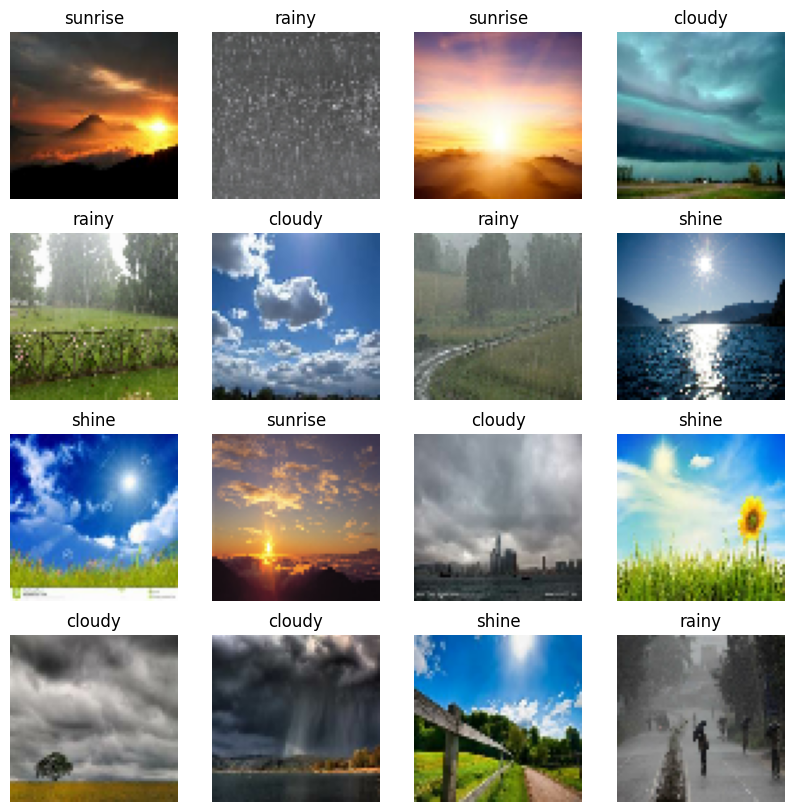

In [4]:
class_names = ["cloudy", "rainy", "shine", "sunrise"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Building model




In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255), #rescalling rgb value between 0 to 1
     tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, (3,3), activation="relu"), #applying Conv2d: filetrs=32, karnel size=(3x3)
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"), #input dense
     tf.keras.layers.Dense(4, activation ="softmax") 
     #output dense: 4 beacuse we have 4 classes in image data
    ]
)


In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Fitting model

In [17]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
    #(not used)earlystopping callback to stop epochs before getting a low val loss value between train and validation data
)

Epoch 1/10
43/43 [==============================] - 7s 97ms/step - loss: 1.5409e-04 - accuracy: 1.0000 - val_loss: 0.9457 - val_accuracy: 0.9640
Epoch 2/10
43/43 [==============================] - 4s 81ms/step - loss: 1.5858e-04 - accuracy: 1.0000 - val_loss: 0.9533 - val_accuracy: 0.9640
Epoch 3/10
43/43 [==============================] - 4s 76ms/step - loss: 1.5610e-04 - accuracy: 1.0000 - val_loss: 0.9553 - val_accuracy: 0.9640
Epoch 4/10
43/43 [==============================] - 3s 66ms/step - loss: 1.3768e-04 - accuracy: 1.0000 - val_loss: 0.9629 - val_accuracy: 0.9640
Epoch 5/10
43/43 [==============================] - 4s 76ms/step - loss: 1.3890e-04 - accuracy: 1.0000 - val_loss: 0.9639 - val_accuracy: 0.9640
Epoch 6/10
43/43 [==============================] - 4s 65ms/step - loss: 1.3754e-04 - accuracy: 1.0000 - val_loss: 0.9642 - val_accuracy: 0.9640
Epoch 7/10
43/43 [==============================] - 3s 64ms/step - loss: 1.1908e-04 - accuracy: 1.0000 - val_loss: 0.9653 - val_ac

In [19]:
model.evaluate(test_ds)

12/12 [==============================] - 1s 13ms/step - loss: 0.4481 - accuracy: 0.9509


[0.4481050372123718, 0.9508928656578064]

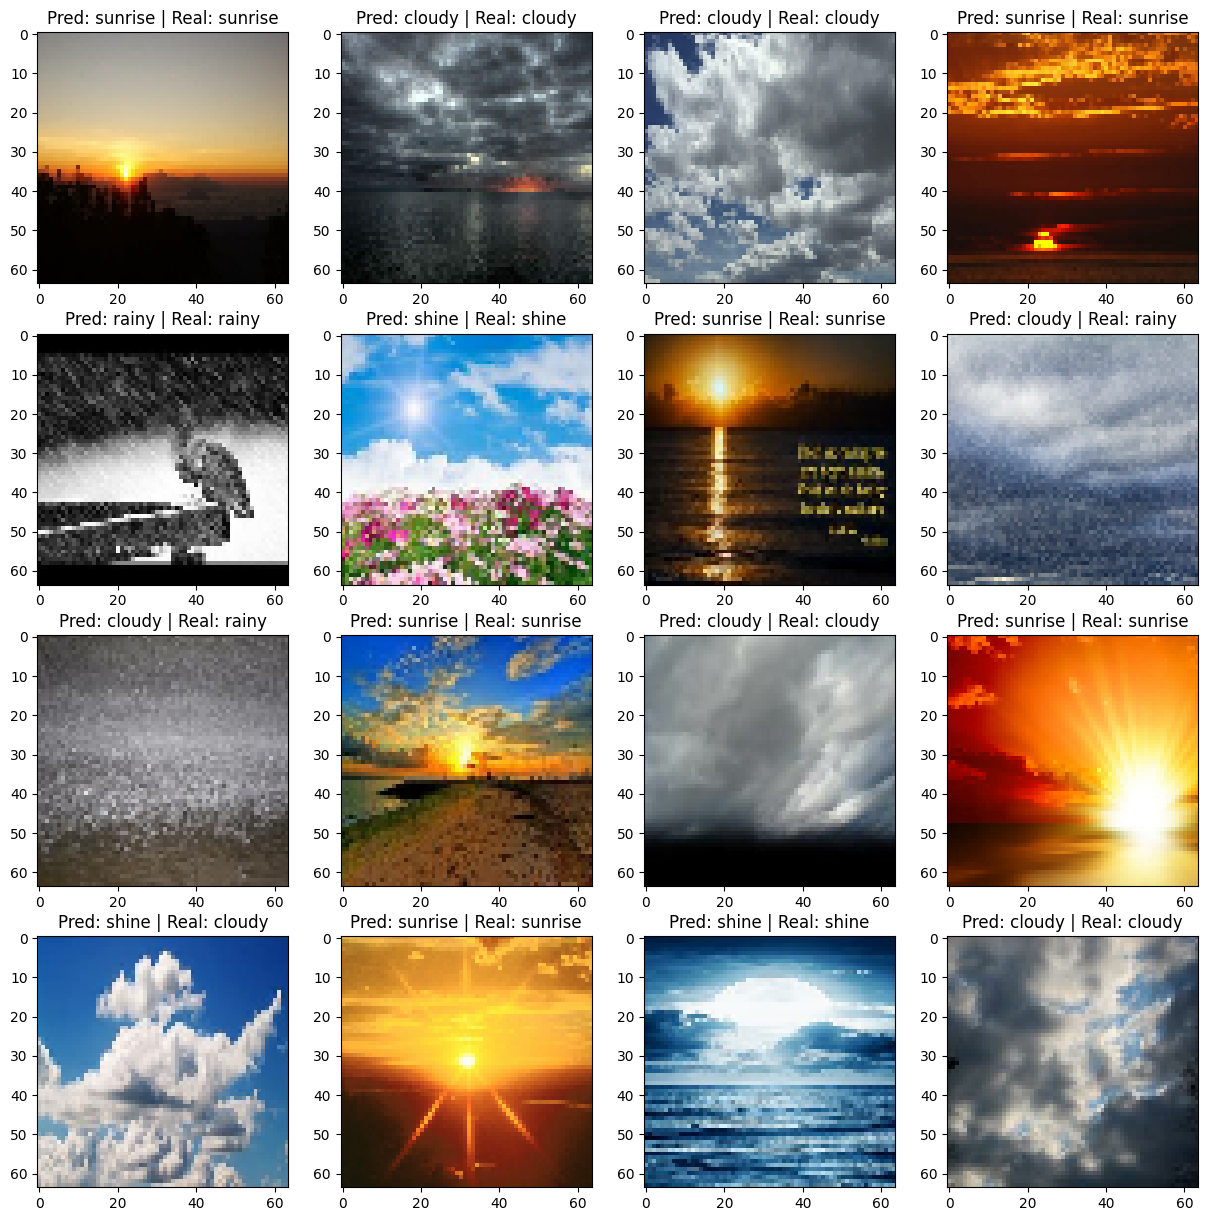

In [9]:
import numpy

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  classifications = model(images)

  
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

This part converts a downloadable part then we can use it in android studio to build a mobile app 

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)